In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
     

In [221]:
df1 = pd.read_csv('charger.csv')


In [7]:
df1.head(5)

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [13]:
df1.isnull().sum()

Region      0
2W          0
3W          0
4W          0
Bus         0
Chargers    0
dtype: int64

In [15]:
df1.duplicated().sum()

0

In [17]:
df1.shape

(24, 6)

In [55]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
2W,24.0,8421.458333,10942.261145,187.0,848.00,2967.5,10697.75,38558.0
3W,24.0,3853.166667,8850.690961,234.0,512.75,931.0,2659.25,42881.0
4W,24.0,334.041667,476.930628,12.0,34.75,129.0,434.00,1895.0
Bus,24.0,28.500000,63.771331,0.0,0.00,0.0,5.50,197.0
Chargers,24.0,106.791667,96.623869,10.0,25.00,67.5,180.25,317.0


In [19]:
df2=pd.read_excel('station.xlsx')

In [21]:
df2.head(5)

,"The number of electric vehicles currently being used on the roads of India, State wise as on\n\n14-07-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
1,1,Andaman & Nicobar Island,162,146945,147107
2,2,Arunachal Pradesh,20,252965,252985
3,3,Assam,64766,4677053,4741819
4,4,Bihar,83335,10407078,10490413


In [23]:
df2.shape

(34, 5)

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                    --------------  ----- 
 0   The number of electric vehicles currently being used on the roads of India, State wise as on

14-07-2022  34 non-null     object
 1   Unnamed: 1                                                                                                34 non-null     object
 2   Unnamed: 2                                                                                                34 non-null     object
 3   Unnamed: 3                                                                                                34 non-null     object
 4   Unnamed: 4                                                                               

In [27]:
df2.isnull().sum()

The number of electric vehicles currently being used on the roads of India, State wise as on\n\n14-07-2022    0
Unnamed: 1                                                                                                    0
Unnamed: 2                                                                                                    0
Unnamed: 3                                                                                                    0
Unnamed: 4                                                                                                    0
dtype: int64

In [51]:
df2.describe().T

,count,unique,top,freq
"The number of electric vehicles currently being used on the roads of India, State wise as on\n\n14-07-2022",34,34,Sr. No.,1
Unnamed: 1,34,34,State Name,1
Unnamed: 2,34,33,21,2
Unnamed: 3,34,34,Total Non-Electric Vehicle,1
Unnamed: 4,34,34,Total,1


In [29]:
df2.duplicated().sum()

0

In [33]:
df3=pd.read_excel('market.xlsx')

In [35]:
df3.head(5)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [39]:
df3.shape

(103, 14)

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [43]:
df3.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [45]:
df3.duplicated().sum()

0

In [49]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
AccelSec,103.0,7.396117,3.017430,2.1,5.1,7.3,9.0,22.4
TopSpeed_KmH,103.0,179.194175,43.573030,123.0,150.0,160.0,200.0,410.0
Range_Km,103.0,338.786408,126.014444,95.0,250.0,340.0,400.0,970.0
Efficiency_WhKm,103.0,189.165049,29.566839,104.0,168.0,180.0,203.0,273.0
FastCharge_KmH,103.0,444.271845,203.949253,170.0,260.0,440.0,555.0,940.0
Seats,103.0,4.883495,0.795834,2.0,5.0,5.0,5.0,7.0
PriceEuro,103.0,55811.563107,34134.665280,20129.0,34429.5,45000.0,65000.0,215000.0


In [57]:
df1.head(3)

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172


<Axes: xlabel='Region'>

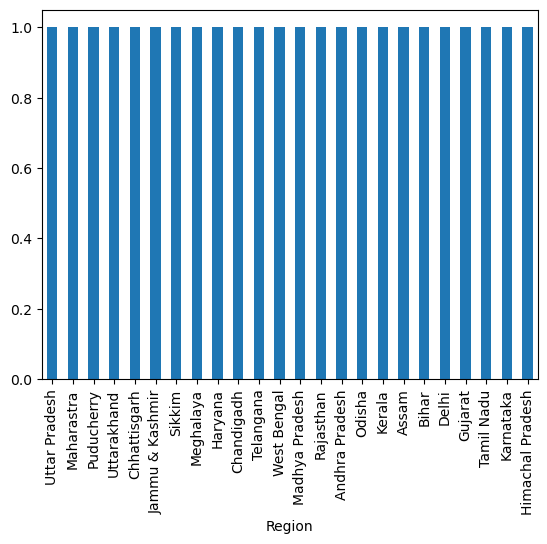

In [63]:
df1['Region'].value_counts().plot(kind='bar')

<Axes: xlabel='2W', ylabel='Region'>

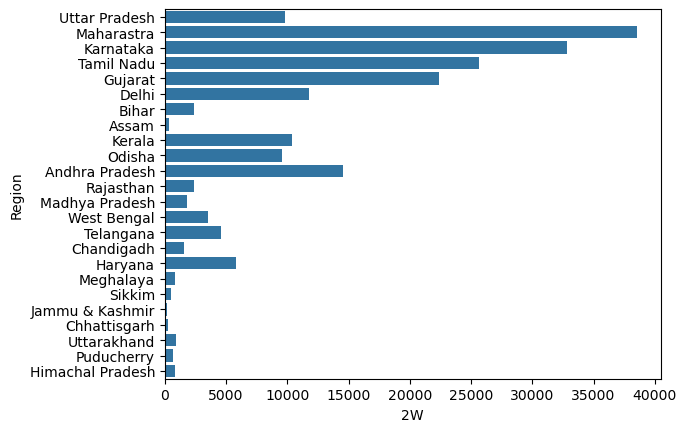

In [67]:
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='2W')

<Axes: xlabel='3W', ylabel='Region'>

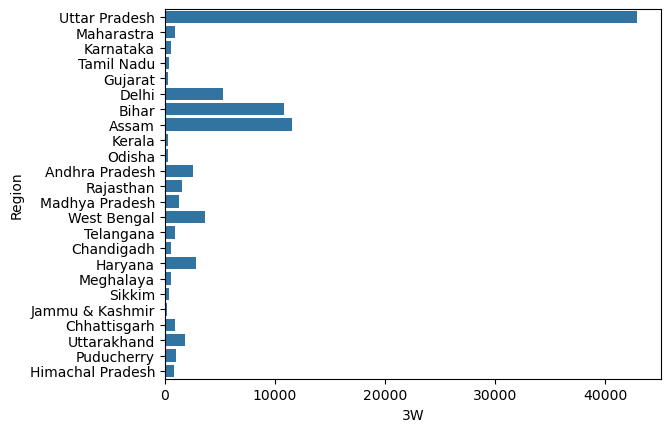

In [71]:
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='3W')

<Axes: xlabel='4W', ylabel='Region'>

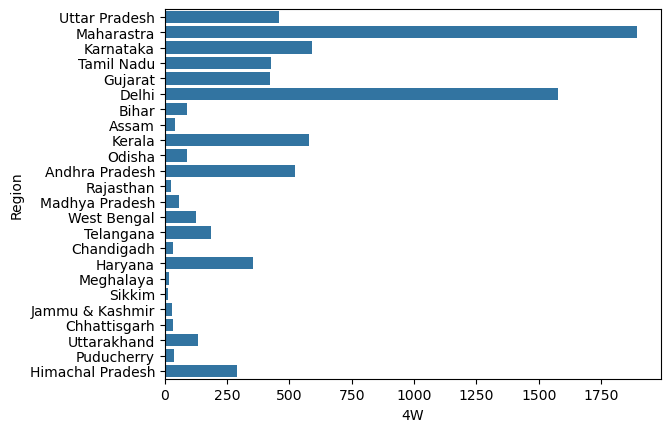

In [73]:
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='4W')

<Axes: xlabel='3W'>

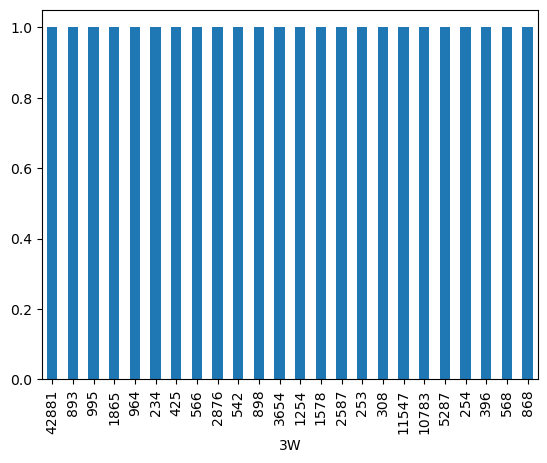

In [93]:
ab=df1.groupby('Region').agg({'2W':'sum','3W':'sum'})

In [95]:
ab

,2W,3W
Region,,
Andhra Pradesh,14578,2587
Assam,357,11547
Bihar,2388,10783
Chandigadh,1567,542
Chhattisgarh,259,964
Delhi,11756,5287
Gujarat,22359,254
Haryana,5782,2876
Himachal Pradesh,824,868


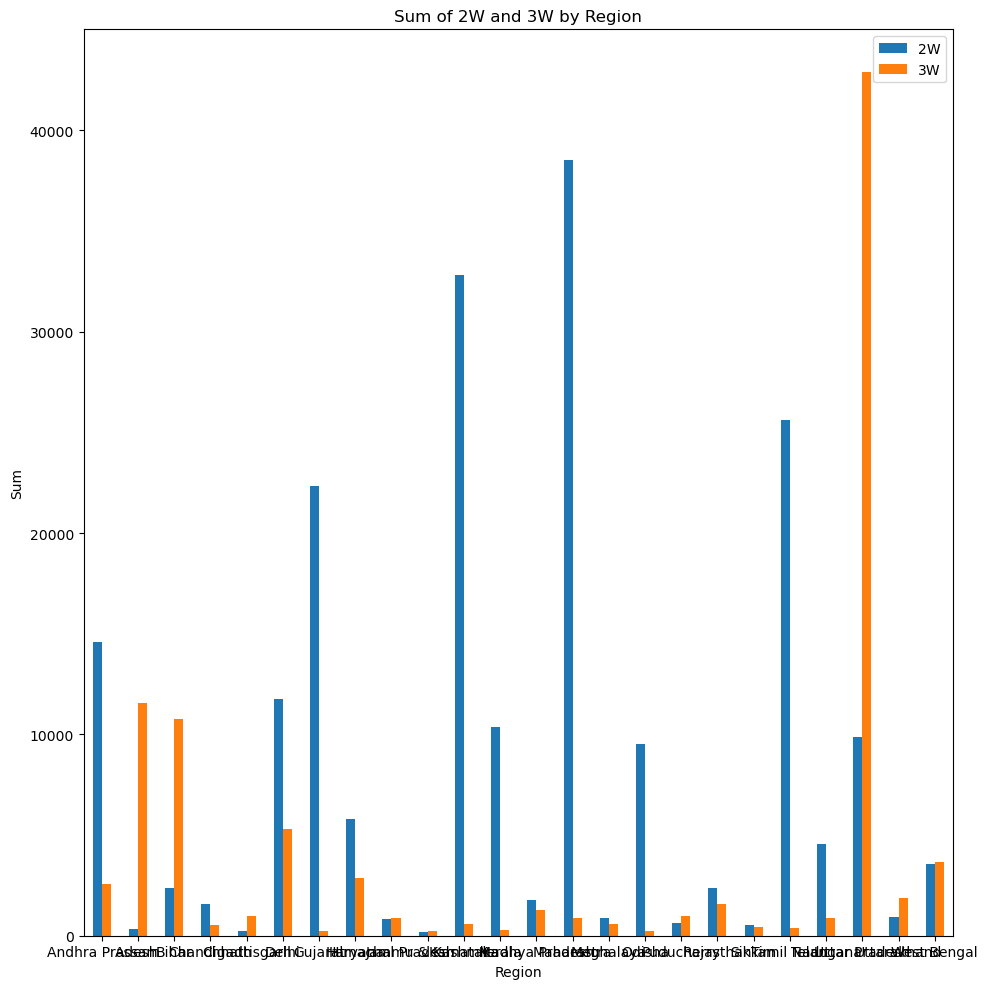

In [108]:
ab.plot(kind='bar', figsize=(10, 10))
plt.title('Sum of 2W and 3W by Region')
plt.ylabel('Sum')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

<Axes: >

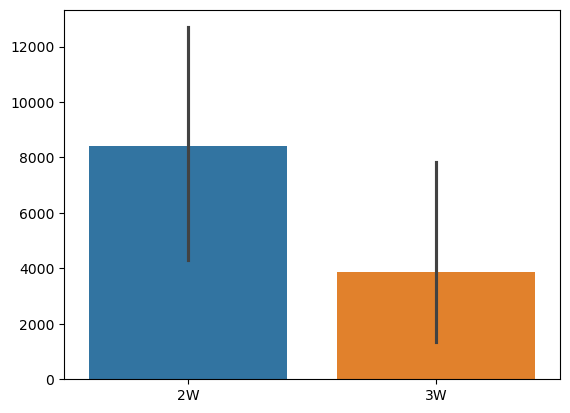

In [112]:
sns.barplot(data=ab)

<Axes: xlabel='Chargers', ylabel='Region'>

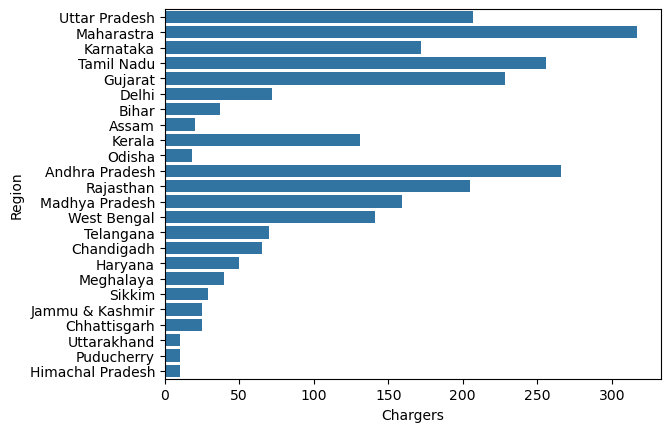

In [116]:
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='Chargers')

In [118]:
ac=df1.groupby(['Region','Chargers']).agg({'2W':'sum','3W':'sum'})

In [120]:
ac

,,2W,3W
Region,Chargers,,
Andhra Pradesh,266,14578,2587
Assam,20,357,11547
Bihar,37,2388,10783
Chandigadh,65,1567,542
Chhattisgarh,25,259,964
Delhi,72,11756,5287
Gujarat,228,22359,254
Haryana,50,5782,2876
Himachal Pradesh,10,824,868


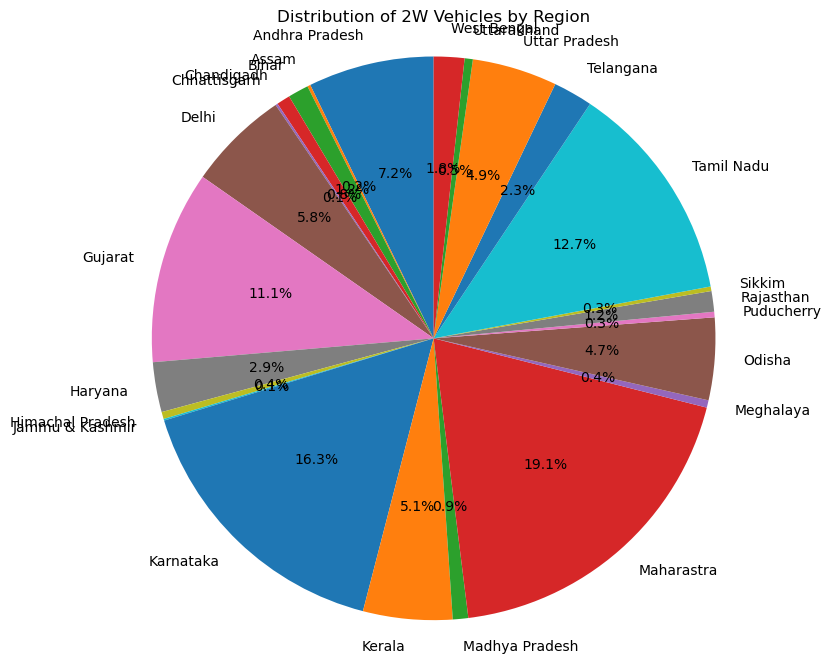

In [122]:
region_data = ac.groupby('Region')['2W'].sum()


plt.figure(figsize=(8, 8))
plt.pie(region_data, labels=region_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of 2W Vehicles by Region')
plt.axis('equal')  
plt.show()

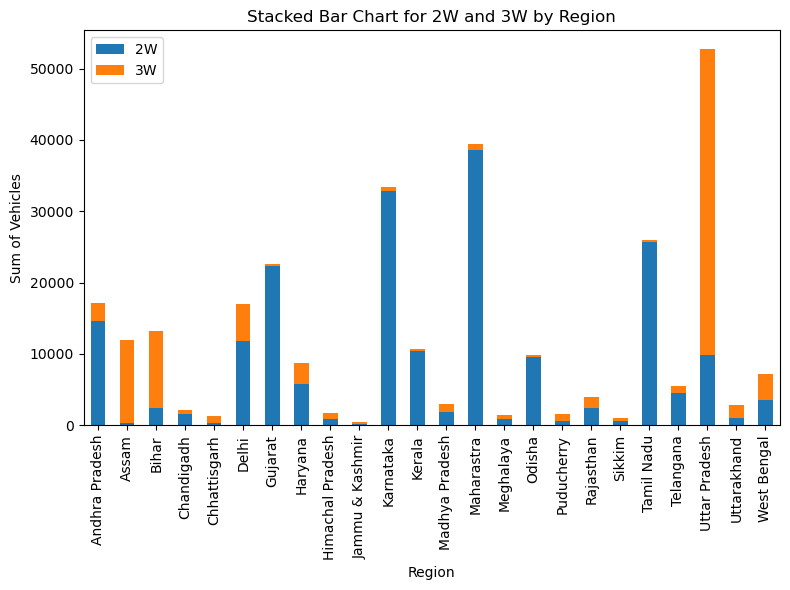

In [124]:
ac = df1.groupby(['Region', 'Chargers']).agg({'2W':'sum', '3W':'sum'})


ac_grouped = ac.groupby('Region').sum()


ac_grouped.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Stacked Bar Chart for 2W and 3W by Region')
plt.ylabel('Sum of Vehicles')
plt.xlabel('Region')
plt.tight_layout()


plt.show()

In [128]:
df2.head()

,"The number of electric vehicles currently being used on the roads of India, State wise as on\n\n14-07-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
1,1,Andaman & Nicobar Island,162,146945,147107
2,2,Arunachal Pradesh,20,252965,252985
3,3,Assam,64766,4677053,4741819
4,4,Bihar,83335,10407078,10490413


Text(29.574331275720183, 0.5, 'Count')

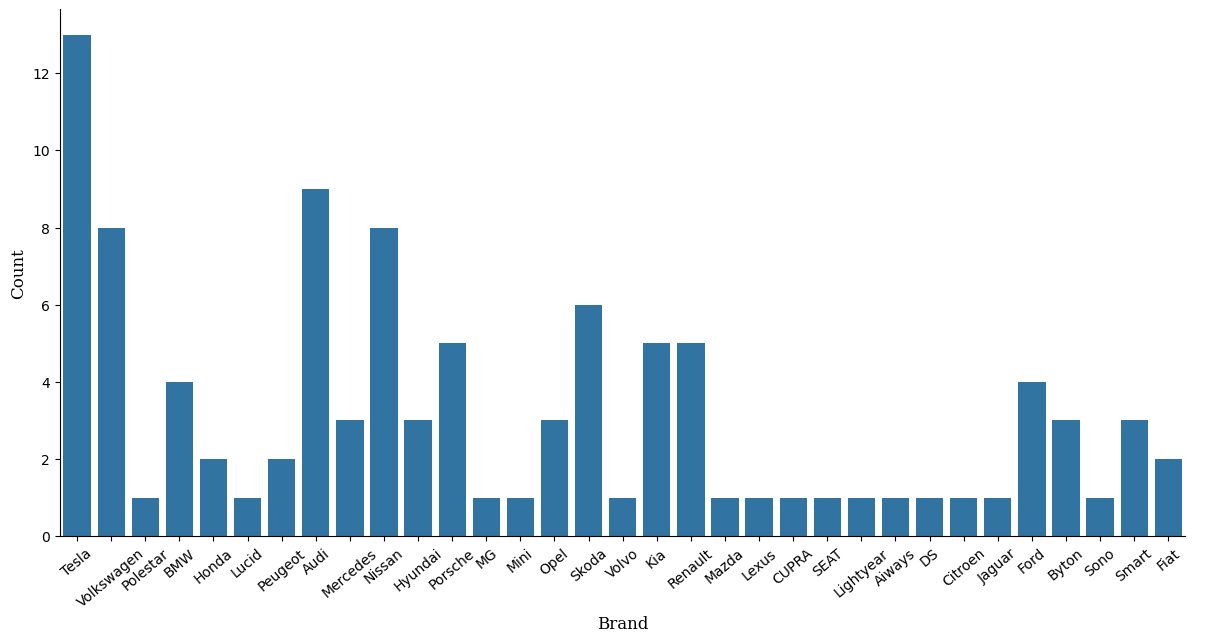

In [142]:
sns.catplot(data=df3, x='Brand', kind='count', height=6, aspect=2)

plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)


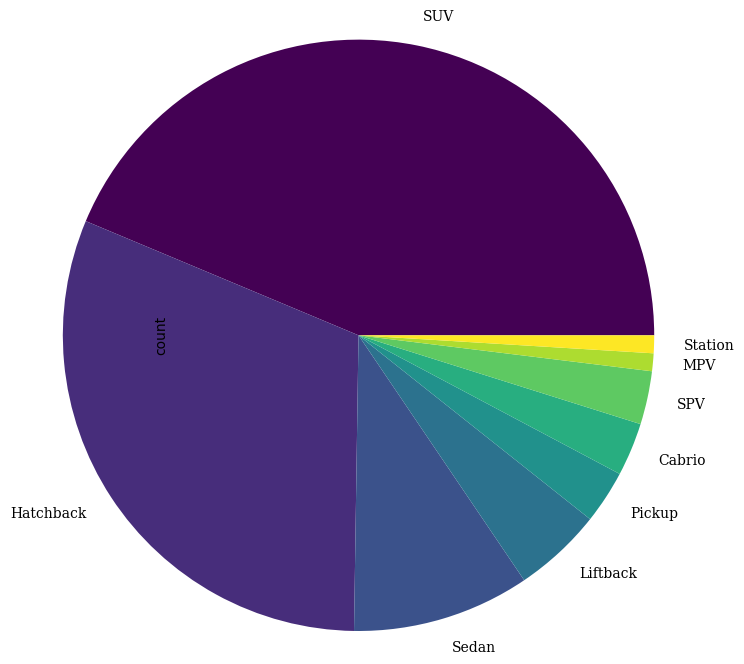

In [144]:
x = df3['BodyStyle'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))

In [146]:
df3.head(2)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000


<Axes: xlabel='Seats', ylabel='count'>

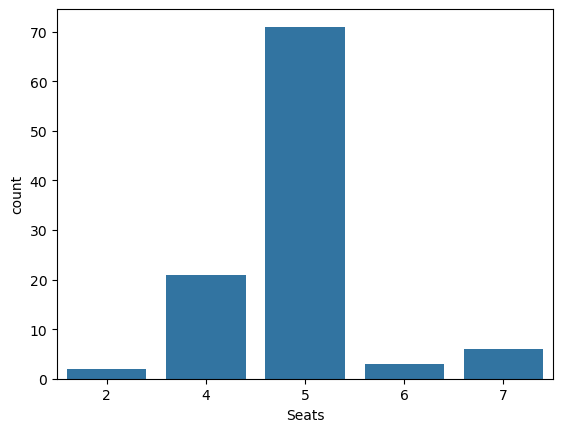

In [150]:
sns.countplot(data=df3, x='Seats')

C:\Users\mishr\AppData\Local\Temp\ipykernel_22536\1124784919.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', data=df3, x='Brand', y='Seats', ci=None, height=6, aspect=2)


Text(29.49215534979426, 0.5, 'Number of Seats')

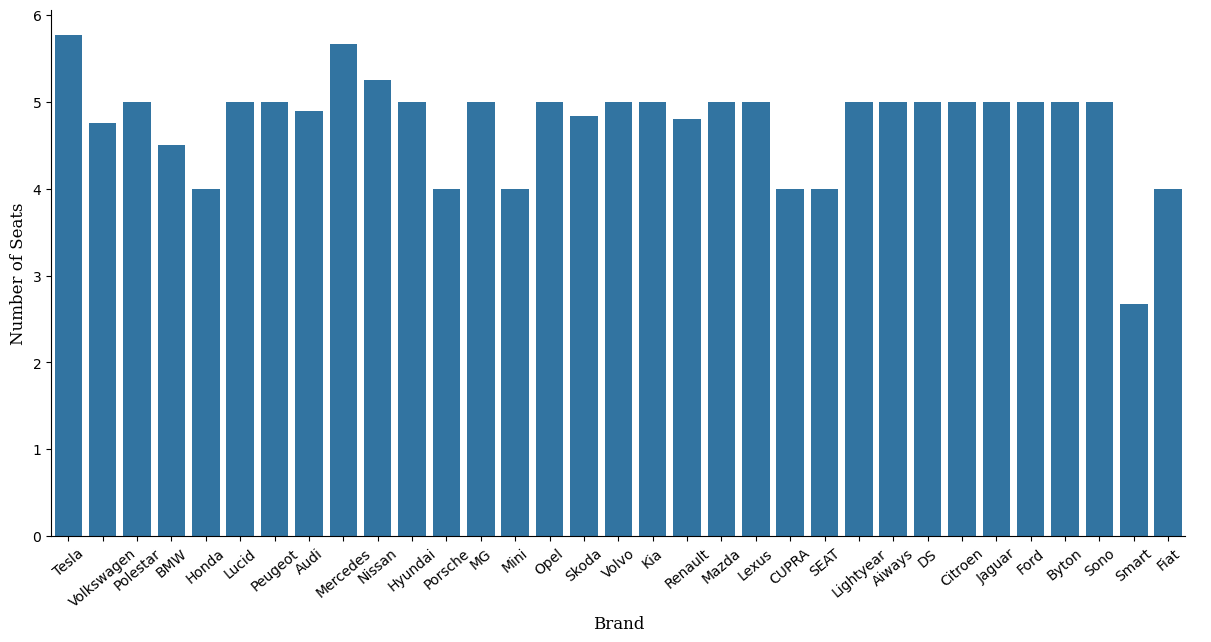

In [156]:
sns.catplot(kind='bar', data=df3, x='Brand', y='Seats', ci=None, height=6, aspect=2)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)

<Axes: ylabel='PlugType'>

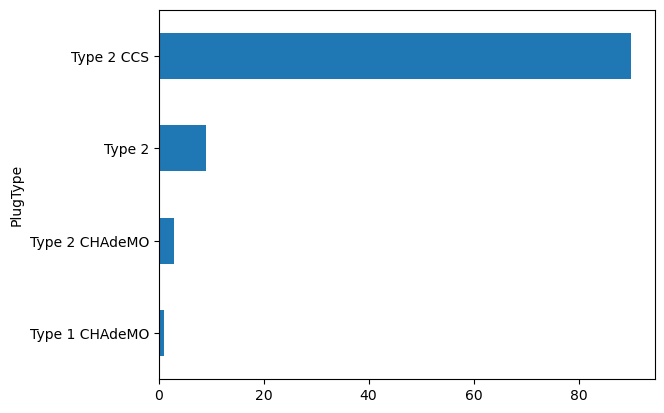

In [160]:
df3['PlugType'].value_counts().sort_values(ascending=True).plot(kind='barh')

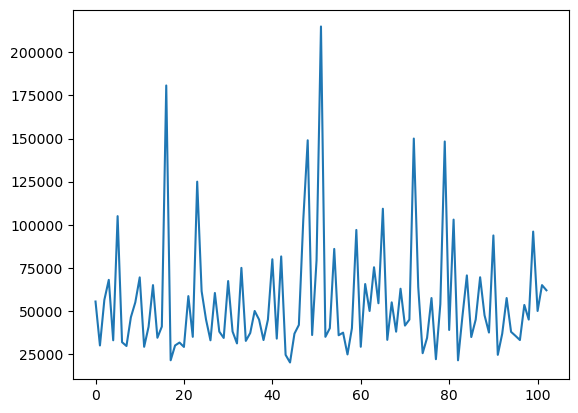

In [164]:
plt.plot(df3['PriceEuro'])

C:\Users\mishr\AppData\Local\Temp\ipykernel_22536\2840550902.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df3, y='Brand', x='AccelSec', ci=None)


Text(0.5, 0, 'Accleration')

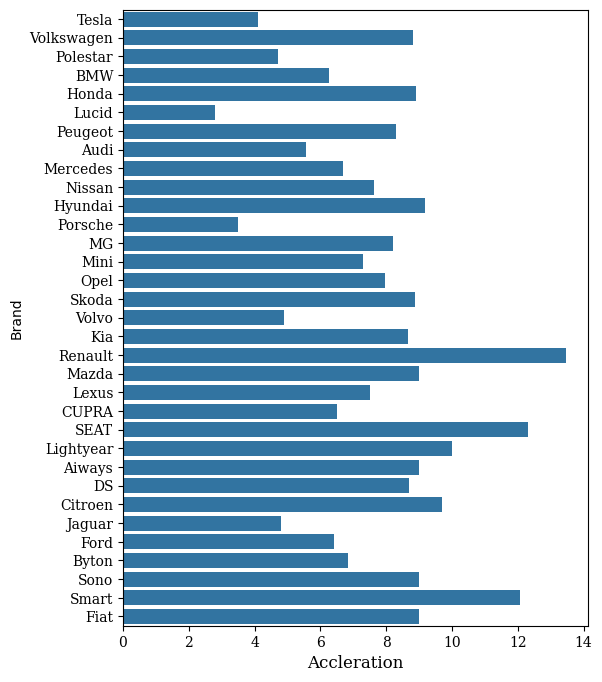

In [168]:
plt.figure(figsize=(6, 8))
sns.barplot(data=df3, y='Brand', x='AccelSec', ci=None)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Accleration', family='serif', size=12)

C:\Users\mishr\AppData\Local\Temp\ipykernel_22536\2450988303.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df3, x='TopSpeed_KmH', y='Brand', ci=None)


Text(0.5, 0, 'Max Speed')

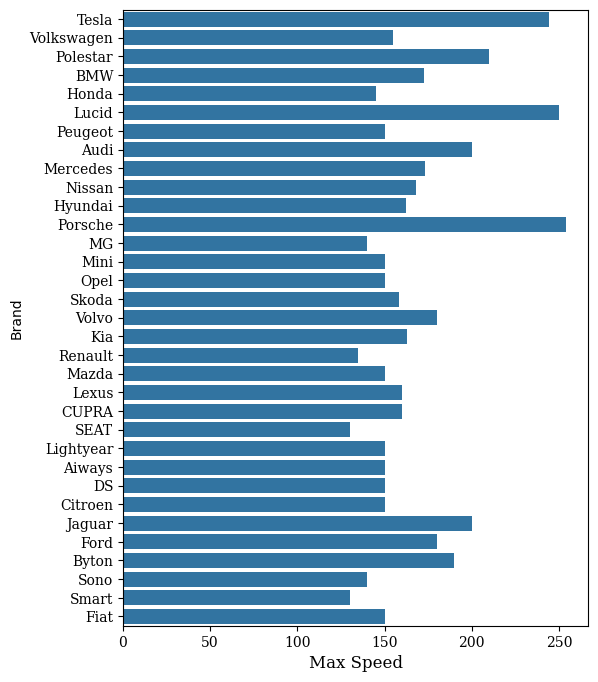

In [172]:
plt.figure(figsize=(6, 8))
sns.barplot(data=df3, x='TopSpeed_KmH', y='Brand', ci=None)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Max Speed', family='serif', size=12)

In [180]:
df3['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df3['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

C:\Users\mishr\AppData\Local\Temp\ipykernel_22536\3514459306.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)
C:\Users\mishr\AppData\Local\Temp\ipykernel_22536\3514459306.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

In [182]:
X = df3[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]
     

In [184]:
x

<Axes: ylabel='count'>

In [192]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
     

In [194]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904


C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

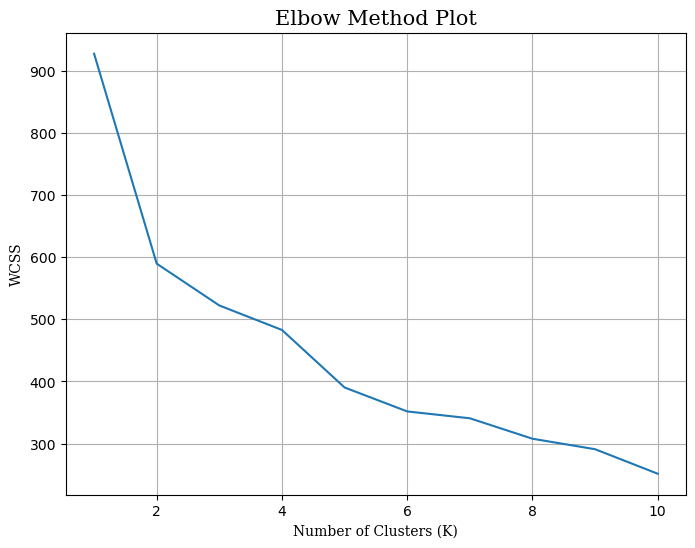

In [198]:
wcss = [] 


for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=90) 
    kmeans.fit(X_pca)  
    wcss.append(kmeans.inertia_)  


plt.figure(figsize=(8, 6))  
plt.title('Elbow Method Plot', size=15, family='serif') 
plt.plot(range(1, 11), wcss)  
plt.xlabel('Number of Clusters (K)', family='serif')  
plt.ylabel('WCSS', family='serif') 
plt.grid(True)  
plt.show() 

In [200]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)
     

C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [202]:
pd.Series(kmean.labels_).value_counts()
     

1    38
2    30
3    18
0    17
Name: count, dtype: int64

In [207]:
df3['clusters'] = kmean.labels_

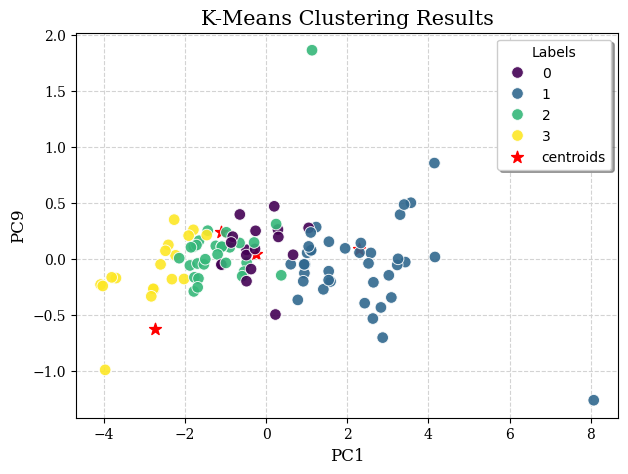

In [209]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

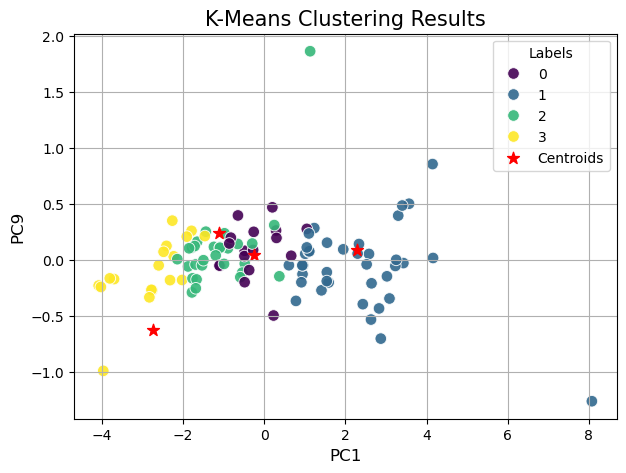

In [211]:
plt.figure(figsize=(7, 5))  


sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', alpha=0.9)


plt.scatter(x=kmean.cluster_centers_[:, 0], y=kmean.cluster_centers_[:, 1], marker="*", c="r", s=80, label="Centroids")


plt.xlabel('PC1', size=12) 
plt.ylabel('PC9', size=12)  


plt.grid(True)


plt.legend(title='Labels')


plt.title('K-Means Clustering Results', size=15)


plt.show()

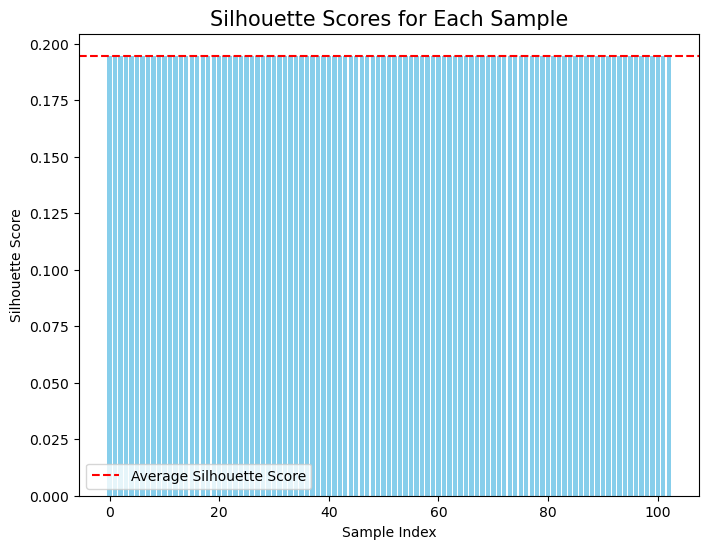

In [223]:
silhouette_vals = silhouette_score(X_pca, kmean.labels_)
plt.figure(figsize=(8, 6))
plt.bar(range(len(kmean.labels_)), silhouette_vals, color='skyblue')
plt.axhline(y=silhouette_vals.mean(), color='r', linestyle='--', label='Average Silhouette Score')
plt.title('Silhouette Scores for Each Sample', size=15)
plt.xlabel('Sample Index')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

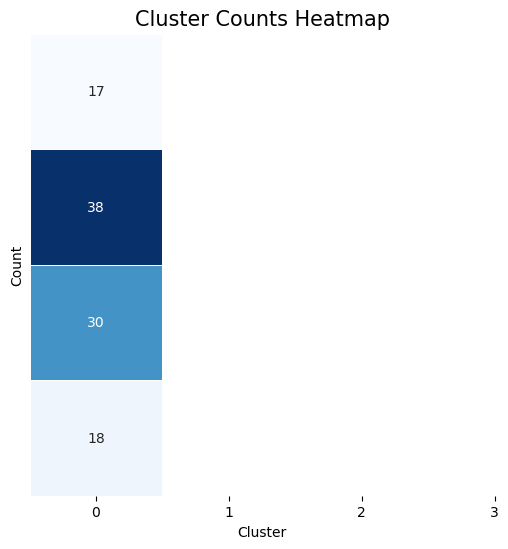

In [225]:
cluster_counts = pd.Series(kmean.labels_).value_counts().sort_index()
plt.figure(figsize=(6, 6))
sns.heatmap(cluster_counts.values.reshape(-1, 1), annot=True, cmap='Blues', cbar=False, linewidths=.5)
plt.title('Cluster Counts Heatmap', size=15)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(np.arange(0.5, len(cluster_counts), 1), cluster_counts.index)
plt.yticks([])
plt.show()